## CSCI-UA 476 Class Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('income.csv', names=['Zip', 'MedianIncome'])

df2 = pd.read_csv('tree_dbh.csv', names=['Zip', 'TreeDBH'])

df3 = pd.read_csv('health_summary.csv', names=['zip', 'Good', 'Fair', 'Poor'])

## df1

In [3]:
df1.isnull().sum()

Zip             0
MedianIncome    0
dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zip           173 non-null    int64  
 1   MedianIncome  173 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [5]:
df1

,Zip,MedianIncome
0,11101,64705.18055
1,11102,64705.18055
2,11103,64705.18055
3,11105,64705.18055
4,11106,64705.18055
...,...,...
168,10040,50828.08559
169,10039,50828.08559
170,10466,53255.73583
171,10469,53255.73583


## df2

In [6]:
df2.isnull().sum()

Zip        0
TreeDBH    0
dtype: int64

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zip      191 non-null    int64  
 1   TreeDBH  191 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.1 KB


In [8]:
df2

,Zip,TreeDBH
0,11375,13.227974
1,11357,13.124986
2,11211,10.190620
3,11215,11.545041
4,10023,8.642760
...,...,...
186,11096,4.666667
187,11430,5.054054
188,11371,11.853448
189,11451,9.888889


## df3

In [9]:
df3

,zip,Good,Fair,Poor
0,11375,{'Fair': 981,'Good': 5566,'Poor': 195}
1,11357,{'Fair': 758,'Good': 8092,'Poor': 167}
2,11211,{'Good': 3357,'Fair': 493,'Poor': 116}
3,11215,{'Good': 5007,'Poor': 247,'Fair': 896}
4,10023,{'Good': 1756,'Fair': 375,'Poor': 72}
...,...,...,...,...
186,11096,{'Good': 9},NaN,NaN
187,11430,{'Good': 37},NaN,NaN
188,11371,{'Good': 98,'Fair': 14,'Poor': 4}
189,11451,{'Good': 7,'Fair': 1,'Poor': 1}


In [10]:
df3.isnull().sum()

zip     0
Good    0
Fair    2
Poor    7
dtype: int64

In [11]:
df3 = df3.fillna(0)

df3.isnull().sum()

zip     0
Good    0
Fair    0
Poor    0
dtype: int64

In [12]:
df3

,zip,Good,Fair,Poor
0,11375,{'Fair': 981,'Good': 5566,'Poor': 195}
1,11357,{'Fair': 758,'Good': 8092,'Poor': 167}
2,11211,{'Good': 3357,'Fair': 493,'Poor': 116}
3,11215,{'Good': 5007,'Poor': 247,'Fair': 896}
4,10023,{'Good': 1756,'Fair': 375,'Poor': 72}
...,...,...,...,...
186,11096,{'Good': 9},0,0
187,11430,{'Good': 37},0,0
188,11371,{'Good': 98,'Fair': 14,'Poor': 4}
189,11451,{'Good': 7,'Fair': 1,'Poor': 1}


## df3 Transform to df4

In [13]:
df4 = pd.DataFrame(columns=['Zip', 'Good', 'Fair', 'Poor'])

for index, row in df3.iterrows():
    good = 0
    fair = 0
    poor = 0
    
    old_good = str(row['Good'])
    old_fair = str(row['Fair'])
    old_poor = str(row['Poor'])

    if "Good" in old_good:
        val = val.replace("Good:", "")
        val = int(val)

    if "Fair" in old_good:
        val = val.replace("Fair:", "")
        val = int(val)

    if "Poor" in old_good:
        val = val.replace("Poor:", "")
        val = int(val)

    df4 = df4.append({'Zip': row['zip'], 'Good': good, 'Fair': fair, 'Poor': poor}, ignore_index=True)

df4

,Zip,Good,Fair,Poor
0,11375,5566,981,195
1,11357,8092,758,167
2,11211,3357,493,116
3,11215,5007,896,247
4,10023,1756,375,72
...,...,...,...,...
186,11096,9,0,0
187,11430,37,0,0
188,11371,98,14,4
189,11451,7,1,1


In [14]:
df3

,zip,Good,Fair,Poor
0,11375,{'Fair': 981,'Good': 5566,'Poor': 195}
1,11357,{'Fair': 758,'Good': 8092,'Poor': 167}
2,11211,{'Good': 3357,'Fair': 493,'Poor': 116}
3,11215,{'Good': 5007,'Poor': 247,'Fair': 896}
4,10023,{'Good': 1756,'Fair': 375,'Poor': 72}
...,...,...,...,...
186,11096,{'Good': 9},0,0
187,11430,{'Good': 37},0,0
188,11371,{'Good': 98,'Fair': 14,'Poor': 4}
189,11451,{'Good': 7,'Fair': 1,'Poor': 1}


# Final Join

In [15]:
df = pd.merge(df1, df2, on='Zip', how='outer')
df

,Zip,MedianIncome,TreeDBH
0,11101,64705.18055,8.373806
1,11102,64705.18055,9.779252
2,11103,64705.18055,9.323412
3,11105,64705.18055,11.890160
4,11106,64705.18055,11.555259
...,...,...,...
218,11109,NaN,6.266667
219,11096,NaN,4.666667
220,11430,NaN,5.054054
221,11451,NaN,9.888889


In [16]:
df = pd.merge(df, df4, on='Zip', how='outer')
df

,Zip,MedianIncome,TreeDBH,Good,Fair,Poor
0,11101,64705.18055,8.373806,2429,623,193
1,11102,64705.18055,9.779252,1319,258,81
2,11103,64705.18055,9.323412,1875,294,82
3,11105,64705.18055,11.890160,3085,550,125
4,11106,64705.18055,11.555259,1586,228,59
...,...,...,...,...,...,...
218,11109,NaN,6.266667,78,6,6
219,11096,NaN,4.666667,9,0,0
220,11430,NaN,5.054054,37,0,0
221,11451,NaN,9.888889,7,1,1


In [17]:
df.isnull().sum()

Zip              0
MedianIncome    50
TreeDBH         32
Good            32
Fair            32
Poor            32
dtype: int64

In [18]:
# Drop rows with NaN values
df_without = df.dropna()
df_without

,Zip,MedianIncome,TreeDBH,Good,Fair,Poor
0,11101,64705.18055,8.373806,2429,623,193
1,11102,64705.18055,9.779252,1319,258,81
2,11103,64705.18055,9.323412,1875,294,82
3,11105,64705.18055,11.890160,3085,550,125
4,11106,64705.18055,11.555259,1586,228,59
...,...,...,...,...,...,...
168,10040,50828.08559,7.581668,1012,337,102
169,10039,50828.08559,8.967617,664,92,16
170,10466,53255.73583,12.623360,4151,503,149
171,10469,53255.73583,12.754036,5378,731,209


In [19]:
df_without.Zip.unique()

array([11101, 11102, 11103, 11105, 11106, 10280, 10004, 10006, 10282,
       10281, 10007, 10013, 11209, 11360, 11361, 11364, 10458, 10468,
       11205, 11214, 11223, 11230, 11204, 11219, 11212, 11221, 11237,
       11207, 11234, 10026, 10030, 10001, 10031, 10018, 10036, 10019,
       10451, 10452, 11224, 11218, 11238, 11216, 11233, 11225, 11213,
       11203, 11236, 10029, 10035, 11208, 11239, 10457, 10460, 11368,
       11226, 11210, 11354, 11355, 11367, 11358, 11371, 11356, 11365,
       11366, 11435, 10012, 10003, 10011, 10014, 11414, 10474, 11372,
       11432, 11433, 11434, 11436, 11412, 10002, 10027, 10016, 10017,
       10022, 10456, 10459, 10454, 10455, 10037, 11215, 10461, 10467,
       11427, 11428, 11429, 11374, 11375, 11385, 10463, 10471, 11229,
       11235, 10305, 10301, 11377, 11220, 11232, 11693, 11691, 11694,
       11697, 11692, 10465, 10307, 10309, 10314, 10306, 10312, 10304,
       10303, 10308, 10302, 10310, 10462, 10472, 10473, 10453, 10021,
       10028, 10065,

In [20]:
# df.to_csv('final.csv', index=False)

# Correlation Matrix and Heatmap

In [21]:
final = df_without
final.head()

,Zip,MedianIncome,TreeDBH,Good,Fair,Poor
0,11101,64705.18055,8.373806,2429,623,193
1,11102,64705.18055,9.779252,1319,258,81
2,11103,64705.18055,9.323412,1875,294,82
3,11105,64705.18055,11.890160,3085,550,125
4,11106,64705.18055,11.555259,1586,228,59


<AxesSubplot:title={'center':'Correlation between Median Income and Tree DBH'}>

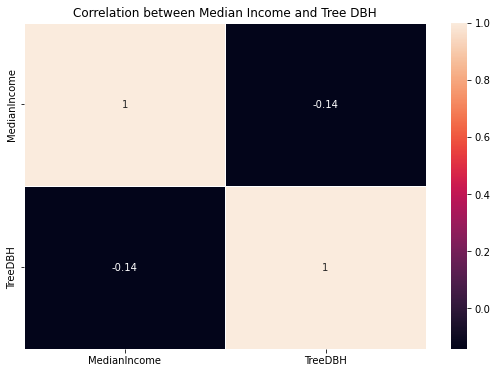

In [22]:
# Build a correlation matrix between median income and tree dbh
corr_income_dbh = final[['MedianIncome', 'TreeDBH']].corr()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(9, 6))
plt.title('Correlation between Median Income and Tree DBH')
sns.heatmap(corr_income_dbh, annot=True, linewidths=.5, ax=ax)


<AxesSubplot:title={'center':'Correlation between Median Income and Health of Trees'}>

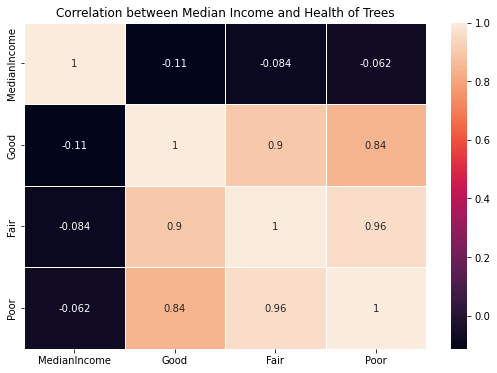

In [23]:
# Build a correlation matrix between median income and health of trees
# Convert the categorical values to numeric values
final.loc[:, 'Good'] = final.loc[:, 'Good'].astype(int)
final.loc[:, 'Fair'] = final.loc[:, 'Fair'].astype(int)
final.loc[:, 'Poor'] = final.loc[:, 'Poor'].astype(int)

corr_income_health = final[['MedianIncome', 'Good', 'Fair', 'Poor']].corr()

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(9, 6))
plt.title('Correlation between Median Income and Health of Trees')
sns.heatmap(corr_income_health, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:title={'center':'Correlation between Median Income and Health of Trees'}>

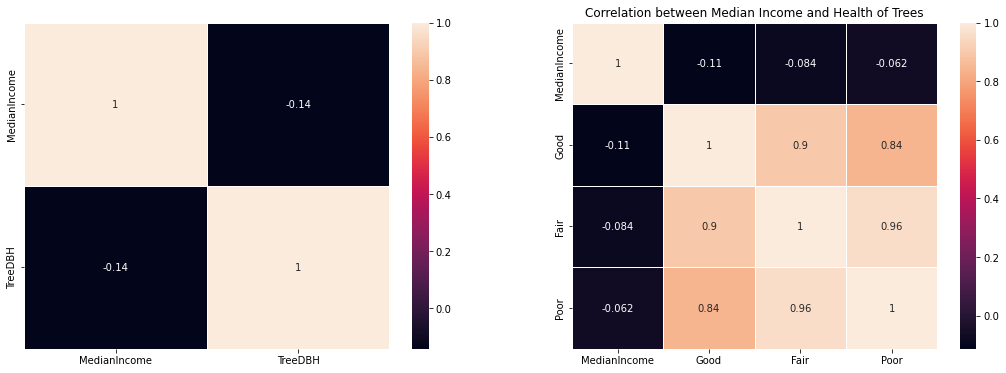

In [24]:
# Draw two heatmaps together
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.title('Correlation between Median Income and Tree DBH')
sns.heatmap(corr_income_dbh, annot=True, linewidths=.5, ax=ax[0])
plt.title('Correlation between Median Income and Health of Trees')
sns.heatmap(corr_income_health, annot=True, linewidths=.5, ax=ax[1])


# Regression Analysis

In [25]:
# Build a linear regression model between median income and tree dbh
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = final[['MedianIncome']]
y = final[['TreeDBH']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Text(0, 0.5, 'Tree DBH')

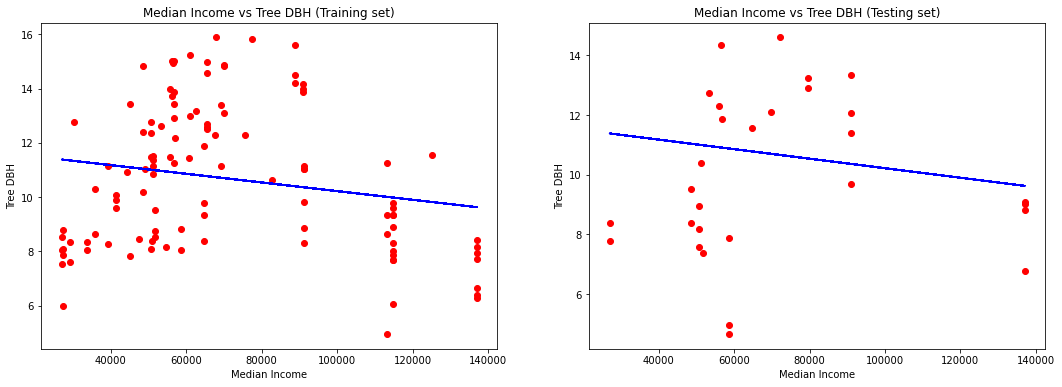

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(X_train, y_train, color='red')
ax[0].plot(X_train, model.predict(X_train), color='blue')
ax[0].set_title('Median Income vs Tree DBH (Training set)')
ax[0].set_xlabel('Median Income')
ax[0].set_ylabel('Tree DBH')
ax[1].scatter(X_test, y_test, color='red')
ax[1].plot(X_train, model.predict(X_train), color='blue')
ax[1].set_title('Median Income vs Tree DBH (Testing set)')
ax[1].set_xlabel('Median Income')
ax[1].set_ylabel('Tree DBH')

In [27]:
# Report the model's performance
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Intercept: %.2f' % model.intercept_)
print('Slope: %.2f' % model.coef_)
print('R-squared: %.2f' % model.score(X_test, y_test))

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)


Mean squared error: 7.68
Coefficient of determination: -0.12
Intercept: 11.82
Slope: -0.00
R-squared: -0.12
                            OLS Regression Results                            
Dep. Variable:                TreeDBH   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.841
Date:                Tue, 18 Apr 2023   Prob (F-statistic):             0.0941
Time:                        17:17:48   Log-Likelihood:                -336.05
No. Observations:                 141   AIC:                             676.1
Df Residuals:                     139   BIC:                             682.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Mean squared error: 5932745.15
Coefficient of determination: -0.01
Intercept: 3815.68
Slope: -0.01
R-squared: -0.01
                            OLS Regression Results                            
Dep. Variable:                   Good   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.817
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.180
Time:                        17:17:48   Log-Likelihood:                -1298.7
No. Observations:                 141   AIC:                             2601.
Df Residuals:                     139   BIC:                             2607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

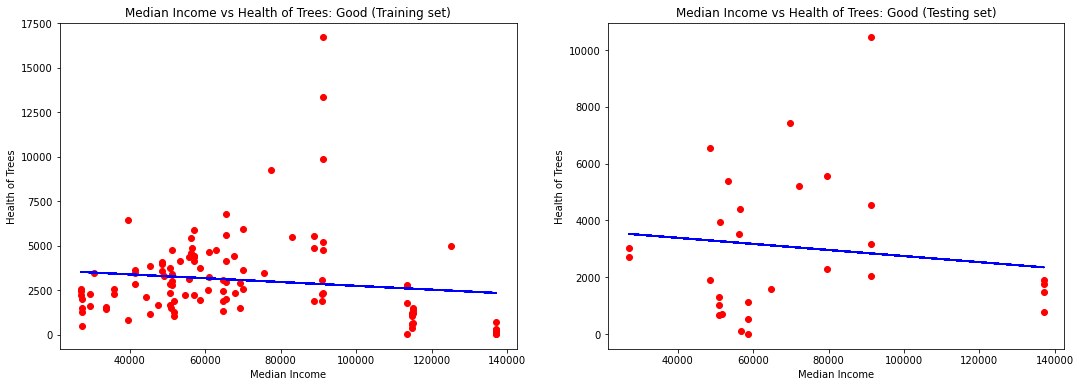

In [28]:
# Build a linear regression model between median income and health of trees
# Split the data into training and testing sets

# ---------------------------------- Good ---------------------------------- #
X = final[['MedianIncome']]
y = final[['Good']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(X_train, y_train, color='red')
ax[0].plot(X_train, model.predict(X_train), color='blue')
ax[0].set_title('Median Income vs Health of Trees: Good (Training set)')
ax[0].set_xlabel('Median Income')
ax[0].set_ylabel('Health of Trees')
ax[1].scatter(X_test, y_test, color='red')
ax[1].plot(X_train, model.predict(X_train), color='blue')
ax[1].set_title('Median Income vs Health of Trees: Good (Testing set)')
ax[1].set_xlabel('Median Income')
ax[1].set_ylabel('Health of Trees')

# Report the model's performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Intercept: %.2f' % model.intercept_)
print('Slope: %.2f' % model.coef_)
print('R-squared: %.2f' % model.score(X_test, y_test))

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)


Mean squared error: 236931.98
Coefficient of determination: 0.01
Intercept: 647.59
Slope: -0.00
R-squared: 0.01
                            OLS Regression Results                            
Dep. Variable:                   Fair   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9883
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.322
Time:                        17:17:48   Log-Likelihood:                -1064.8
No. Observations:                 141   AIC:                             2134.
Df Residuals:                     139   BIC:                             2139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------

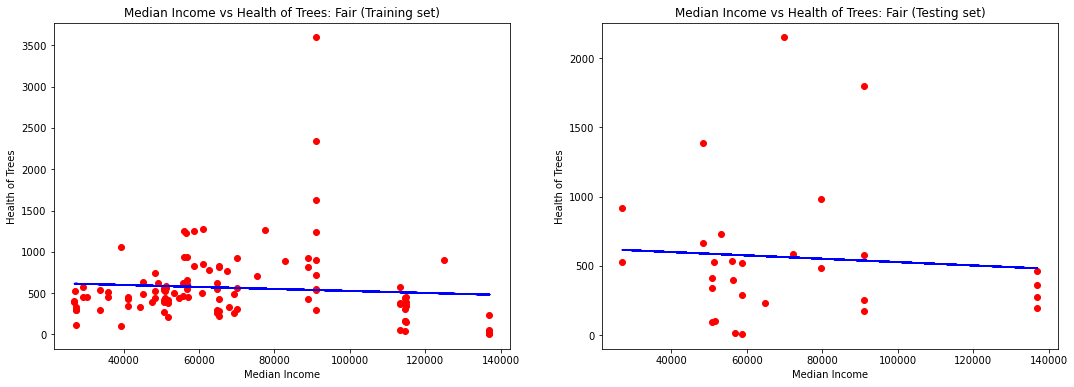

In [29]:
# ---------------------------------- Fair ---------------------------------- #
X = final[['MedianIncome']]
y = final[['Fair']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(X_train, y_train, color='red')
ax[0].plot(X_train, model.predict(X_train), color='blue')
ax[0].set_title('Median Income vs Health of Trees: Fair (Training set)')
ax[0].set_xlabel('Median Income')
ax[0].set_ylabel('Health of Trees')
ax[1].scatter(X_test, y_test, color='red')
ax[1].plot(X_train, model.predict(X_train), color='blue')
ax[1].set_title('Median Income vs Health of Trees: Fair (Testing set)')
ax[1].set_xlabel('Median Income')
ax[1].set_ylabel('Health of Trees')

# Report the model's performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Intercept: %.2f' % model.intercept_)
print('Slope: %.2f' % model.coef_)
print('R-squared: %.2f' % model.score(X_test, y_test))

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)


Mean squared error: 17613.32
Coefficient of determination: 0.01
Intercept: 173.24
Slope: -0.00
R-squared: 0.01
                            OLS Regression Results                            
Dep. Variable:                   Poor   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5309
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.467
Time:                        17:17:49   Log-Likelihood:                -893.17
No. Observations:                 141   AIC:                             1790.
Df Residuals:                     139   BIC:                             1796.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------

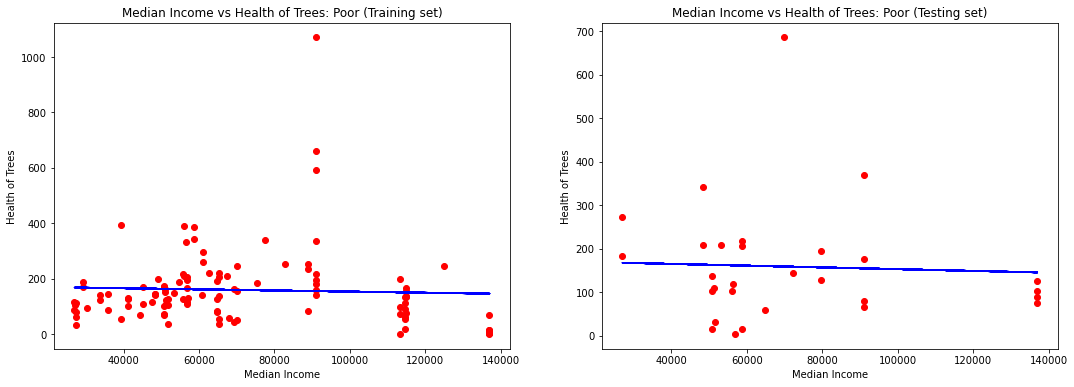

In [30]:
# ---------------------------------- Poor ---------------------------------- #
X = final[['MedianIncome']]
y = final[['Poor']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].scatter(X_train, y_train, color='red')
ax[0].plot(X_train, model.predict(X_train), color='blue')
ax[0].set_title('Median Income vs Health of Trees: Poor (Training set)')
ax[0].set_xlabel('Median Income')
ax[0].set_ylabel('Health of Trees')
ax[1].scatter(X_test, y_test, color='red')
ax[1].plot(X_train, model.predict(X_train), color='blue')
ax[1].set_title('Median Income vs Health of Trees: Poor (Testing set)')
ax[1].set_xlabel('Median Income')
ax[1].set_ylabel('Health of Trees')

# Report the model's performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Intercept: %.2f' % model.intercept_)
print('Slope: %.2f' % model.coef_)
print('R-squared: %.2f' % model.score(X_test, y_test))

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

## Decision Tree Regression

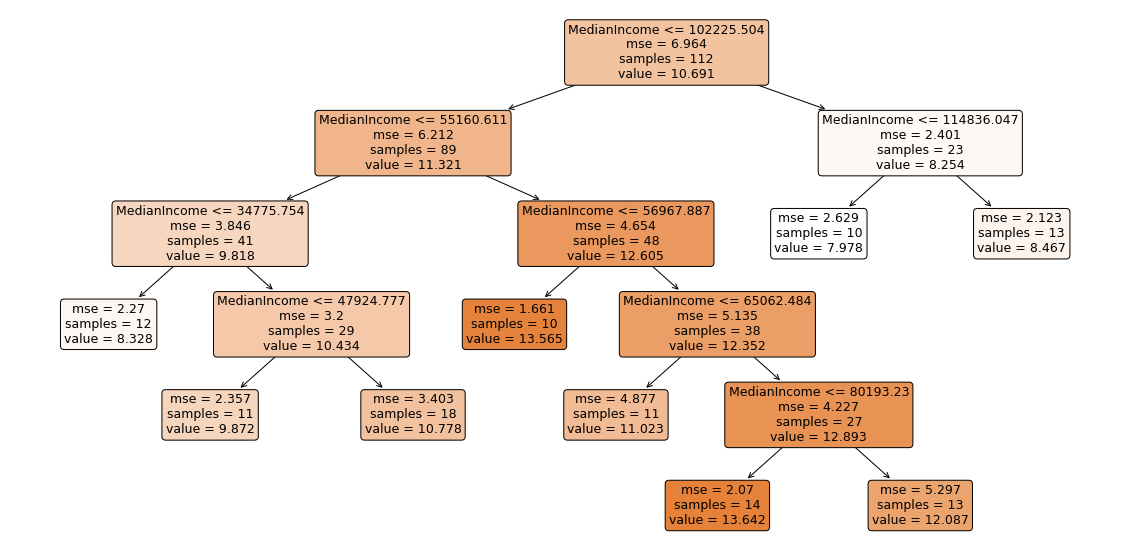

In [31]:
# Build a decision tree model between median income and tree dbh
# Split the data into training and testing sets
from sklearn.tree import DecisionTreeRegressor
X = final[['MedianIncome']]
y = final[['TreeDBH']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# visualize the model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Report the model's performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % model.score(X_test, y_test))

Mean squared error: 5.22
R-squared: 0.24


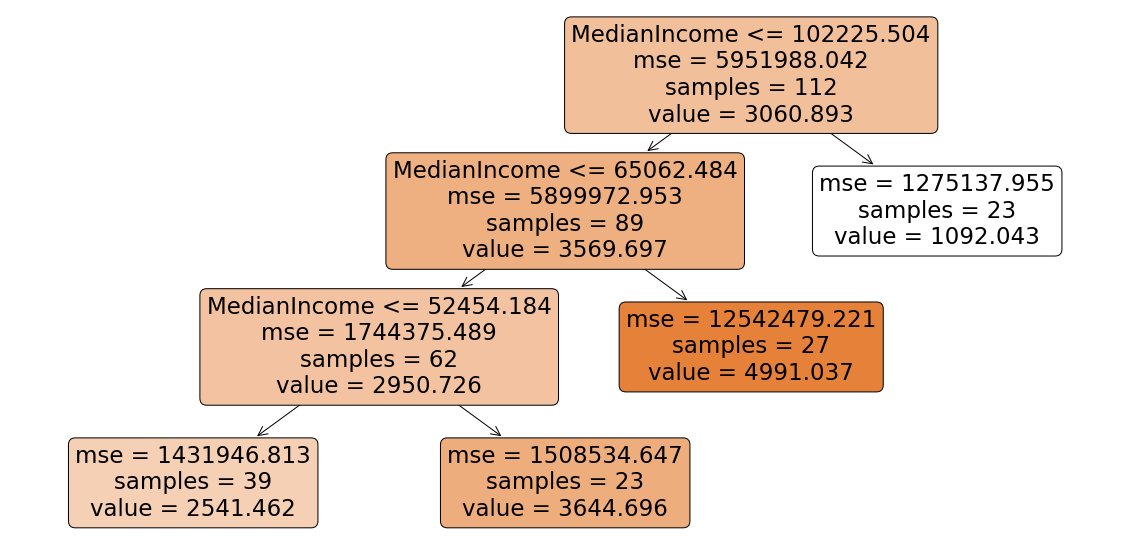

Mean squared error: 4700625.81
R-squared: 0.20


In [32]:
# Build a decision tree model between median income and health of trees
# Split the data into training and testing sets
# ---------------------------------- Good ---------------------------------- #
from sklearn.tree import DecisionTreeRegressor
X = final[['MedianIncome']]
y = final[['Good']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=23, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# visualize the model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Report the model's performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % model.score(X_test, y_test))

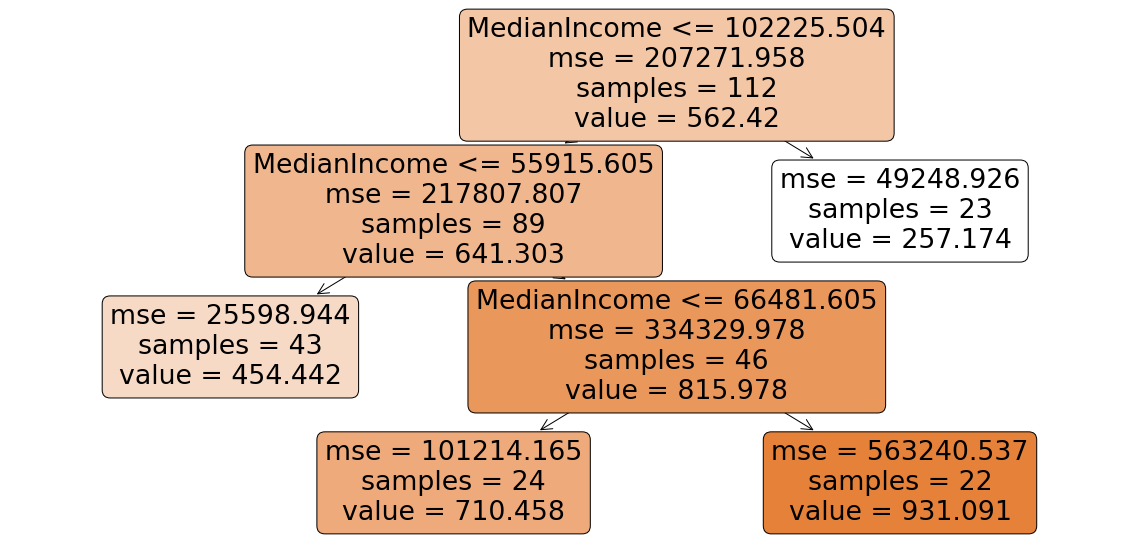

Mean squared error: 234905.51
R-squared: 0.02


In [33]:
# ---------------------------------- Fair ---------------------------------- #
from sklearn.tree import DecisionTreeRegressor
X = final[['MedianIncome']]
y = final[['Fair']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=22, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# visualize the model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Report the model's performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % model.score(X_test, y_test))

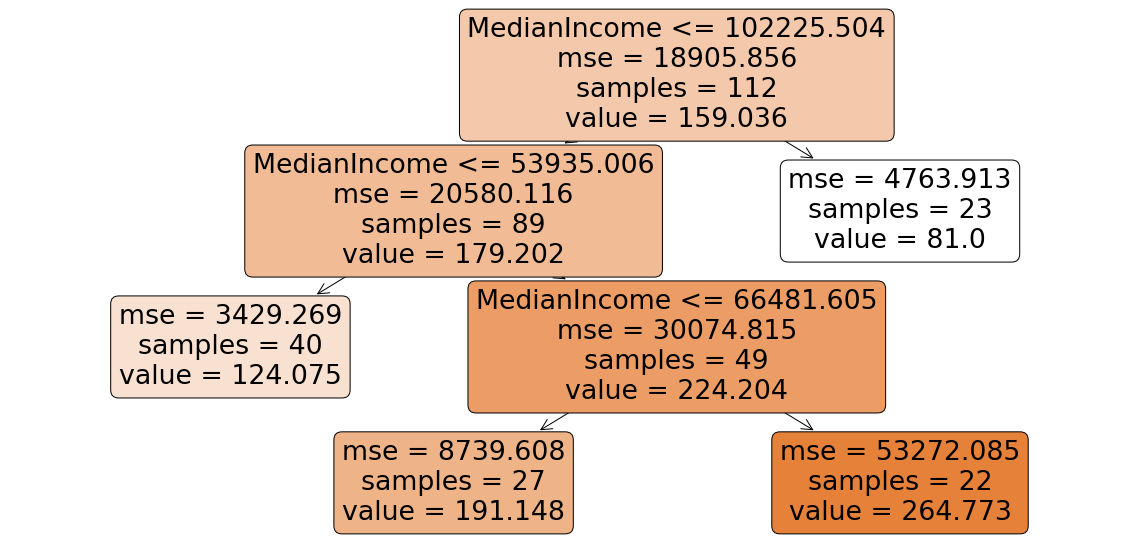

Mean squared error: 17815.88
R-squared: -0.00


In [34]:
# ---------------------------------- Poor ---------------------------------- #
from sklearn.tree import DecisionTreeRegressor
X = final[['MedianIncome']]
y = final[['Poor']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=22, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# visualize the model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Report the model's performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % model.score(X_test, y_test))

## Count the number of countries in each region in the dataset

In [35]:
zip_full = {
    "Astoria": [11101,11102,11103,11105,11106],
    "Battery Park/Tribeca": [10280,10004,10006,10282,10281,10279,10270,10007,10013],
    "Bay Ridge": [11209],
    "Bayside": [11360,11361,11364],
    "Bedford Park": [10458,10468],
    "Bedford Stuyvesant": [11205,11243],
    "Bensonhurst": [11214,11223,11230],
    "Borough Park": [11204,11219],
    "Brownsville":[11212],
    "Bushwick": [11221,11237,11207],
    "Canarsie": [11241,11234,11247],
    "Central Harlem": [10026,10030,10001,10031],
    "Chelsea/Clinton": [10116,10060,10117,12512,10121,10018,10107,10036,10019,13323],
    "Concourse/Highbridge": [10451,10452],
    "Coney Island": [11224,11218,11252],
    "Crown Heights North": [11238,11216,11233],
    "Crown Heights South": [11215,11225,11213],
    "East Flatbush": [11203,11236],
    "East Harlem": [10029,10035],
    "East New York": [11208,11239],
    "East Tremont": [10457,10460],
    "Elmhurst/Corona": [14701,11368],
    "Flatbush/Midwood": [11226,11210],
    "Flushing": [11354,11355,11352,11351,11367,11358,11381,11371,11356,11386],
    "Fort Greene": [11217,11201],
    "Fresh Meadows/Briarwood": [11365,11366,11435],
    "Greenwich Village": [10012,10003,10119,10011,10014],
    "Howard Beach": [11414],
    "Hunts Point": [10474],
    "Jackson Heights": [11372],
    "Jamaica/St. Albans":[ 11432,11433,11434,11436,11412],
    "Lower East Side":[10002],
    "Manhattanville": [10027],
    "Midtown Business District": [10016,10017,10022],
    "Morrisania": [10456,10459],
    "Mott Haven": [10454,10455,10037],
    "Murray Hill/Stuyvesant": [10165,10158,10172,10177,10176,10175],
    "Pelham Parkway": [10461,10467],
    "Queens Village": [11427,11428,11429],
    "Rego Park/Forest Hills": [11374,11375],
    "Ridgewood/Glendale": [11385],
    "Riverdale": [10463,10471],
    "Sheepshead Bay": [11229,11235],
    "South Beach": [10305],
    "St. George": [10301],
    "Sunnyside/Woodside": [11377],
    "Sunset Park": [11220,11232],
    "The Rockaways": [11693,11691,11694,11695,11690,11518,11697,11692],
    "Throgs Neck": [10465],
    "Tottenville": [10307,10309,10314,10313,10311,10306,10312,10304,10303,10308,10302,10310],
    "Unionport/Soundview": [10462,10472,10473],
    "University Heights": [10453],
    "Upper East Side": [10021,10028,10065,10075,10128],
    "Upper West Side": [10023,10024,10025,10069,10133],
    "Washington Heights": [10033,10032,10040,10039],
    "Williamsbridge": [10466,10469],
    "Williamsburg": [11211,11206,11222],
    "Woodhaven": [11421]
}

In [36]:
# Add a new column at the front of the dataframe, final, called 'County'
final.insert(0, 'County', '')

# Loop through the zip codes and assign the county to the county column
for key, value in zip_full.items():
    for i in value:
        final.loc[final['Zip'] == i, 'County'] = key

final

,County,Zip,MedianIncome,TreeDBH,Good,Fair,Poor
0,Astoria,11101,64705.18055,8.373806,2429,623,193
1,Astoria,11102,64705.18055,9.779252,1319,258,81
2,Astoria,11103,64705.18055,9.323412,1875,294,82
3,Astoria,11105,64705.18055,11.890160,3085,550,125
4,Astoria,11106,64705.18055,11.555259,1586,228,59
...,...,...,...,...,...,...,...
168,Washington Heights,10040,50828.08559,7.581668,1012,337,102
169,Washington Heights,10039,50828.08559,8.967617,664,92,16
170,Williamsbridge,10466,53255.73583,12.623360,4151,503,149
171,Williamsbridge,10469,53255.73583,12.754036,5378,731,209


In [37]:
# Add a new column at the end of the dataframe, final, called 'Tree Count'
final['TreeCount'] = ''

# Loop through the zip codes and assign the tree count to the tree count column based on the sum of the "Good", "Fair", and "Poor" trees, as type int
for key, value in zip_full.items():
    for i in value:
        final.loc[final['Zip'] == i, 'TreeCount'] = ((final.loc[final['Zip'] == i, 'Good']).astype(int) + (final.loc[final['Zip'] == i, 'Fair']).astype(int) + (final.loc[final['Zip'] == i, 'Poor']).astype(int)).astype(int)

final.TreeCount = final.TreeCount.astype(int)
final
# final.to_csv('final.csv', index=False)

In [38]:
num_county_tree = final[['County', 'TreeCount']].groupby('County').sum().sort_values(by='TreeCount', ascending=False)
num_county_tree

,TreeCount
County,
Tottenville,89028
Flushing,25320
Jamaica/St. Albans,24700
Bensonhurst,16994
Bushwick,16005
Bayside,15064
Fresh Meadows/Briarwood,14397
Astoria,12787
Crown Heights South,12439


<AxesSubplot:xlabel='County'>

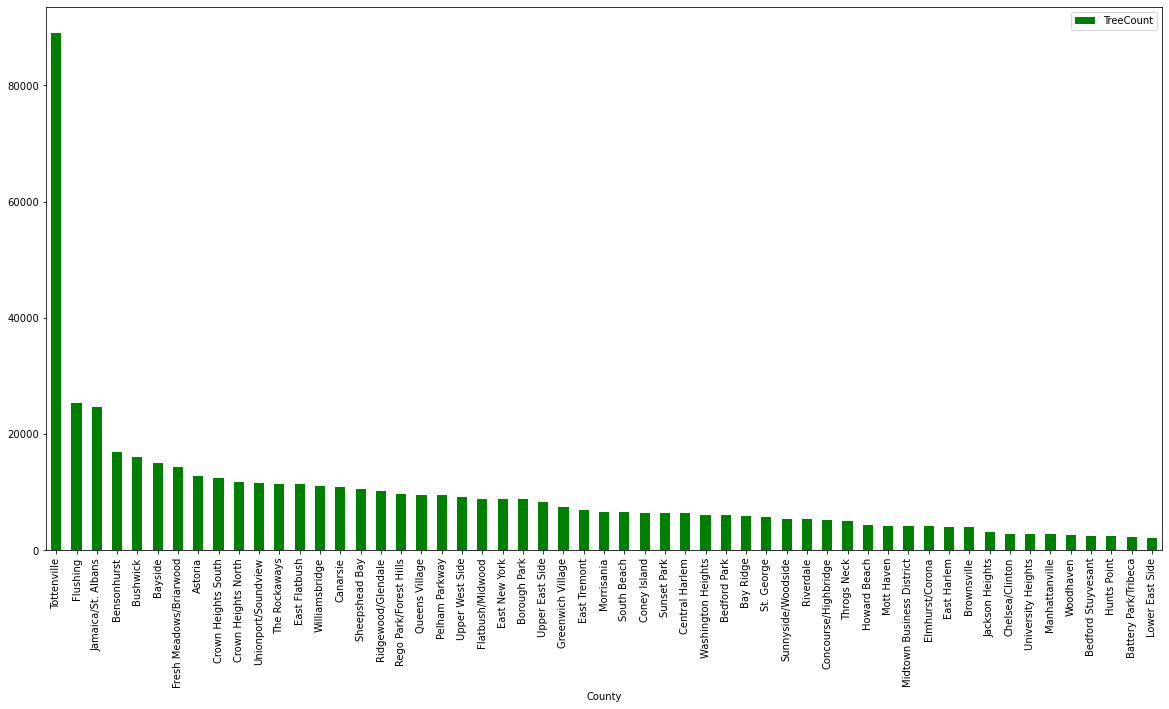

In [39]:
# Plot a bar chart of the tree count by county
num_county_tree.plot(kind='bar', figsize=(20,10), color='green')

In [40]:
new_num_county_tree = pd.read_csv('num_county_tree.csv')

In [41]:
import folium
from folium.plugins import MarkerCluster

# Create a map object centered on a specific location
m = folium.Map(location=[40.748817, -73.985428], zoom_start=12)

# Add a marker for each data point
marker_cluster = MarkerCluster().add_to(m)
for index, row in new_num_county_tree.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    popup = row['County']
    count = row['TreeCount']
    radius = count / 1000  # adjust the radius based on the count
    color = 'red' if count > 10000 else 'blue'  # set the color based on the count
    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=popup,
    ).add_to(marker_cluster)

# Display the map
m